In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
import datetime

Mounted at /content/drive


In [ ]:
user_b=pd.read_csv('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/user_spec.csv')
loan=pd.read_csv('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/loan_result.csv')
log=pd.read_csv('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/log_data.csv')

In [ ]:
user=pd.read_csv('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/clu_df.csv', index_col=0)

# **user 변수 정리**

In [ ]:
user

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,app_count,apply_count,loanlimit_mean,rate_mean
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,...,1000000.0,기타,0.0,NaN,4.0,162000000.0,NaN,NaN,NaN,NaN
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,...,30000000.0,대환대출,0.0,NaN,1.0,27000000.0,32.916667,0.0,2.375000e+07,11.541667
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,...,10000000.0,생활비,0.0,NaN,5.0,15000000.0,31.545455,0.0,2.009091e+07,14.563636
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,...,2000000.0,생활비,0.0,NaN,7.0,344000000.0,37.360000,0.0,1.308000e+07,13.180000
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,...,5000000.0,생활비,0.0,0.0,1.0,16000000.0,56.000000,0.0,9.500000e+06,16.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355401,316356,53701,1996.0,1.0,2022-03-22 10:01:38,730.0,60000000.0,PRIVATEBUSINESS,202105.0,정규직,...,15000000.0,사업자금,NaN,NaN,1.0,NaN,31.555556,3.0,1.644444e+07,12.111111
1355402,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,...,5000000.0,사업자금,NaN,NaN,NaN,NaN,18.250000,3.0,1.375000e+07,16.600000
1355403,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,기타,...,50000000.0,생활비,NaN,NaN,1.0,NaN,34.600000,0.0,3.720000e+07,10.490000
1355404,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,...,100000000.0,대환대출,NaN,NaN,8.0,200000000.0,32.666667,0.0,1.333333e+07,14.116667


In [ ]:
#rehabit관련 변수 새로생성
user.loc[(user['personal_rehabilitation_yn']==1)&(user['personal_rehabilitation_complete_yn']==1),'personal_rehab'] = 'A'
user.loc[(user['personal_rehabilitation_yn']==1)&(user['personal_rehabilitation_complete_yn']==0),'personal_rehab'] = 'B'
user.loc[(user['personal_rehabilitation_yn']==0)&(user['personal_rehabilitation_complete_yn']==1),'personal_rehab'] = 'C'
user.loc[(user['personal_rehabilitation_yn']==0)&(user['personal_rehabilitation_complete_yn']==0),'personal_rehab'] = 'D'
user.loc[(user['personal_rehabilitation_yn'].isna())|(user['personal_rehabilitation_complete_yn'].isna()),'personal_rehab'] = 'unknown'

In [ ]:
# 구칼럼 색제
user.pop('personal_rehabilitation_yn')
user.pop('personal_rehabilitation_complete_yn')

0          NaN
1          NaN
2          NaN
3          NaN
4          0.0
          ... 
1355401    NaN
1355402    NaN
1355403    NaN
1355404    NaN
1355405    NaN
Name: personal_rehabilitation_complete_yn, Length: 1355406, dtype: float64

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1355406 entries, 0 to 1355405
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   application_id       1355406 non-null  int64  
 1   user_id              1355406 non-null  int64  
 2   birth_year           1342874 non-null  float64
 3   gender               1342874 non-null  float64
 4   insert_time          1355406 non-null  object 
 5   credit_score         1280687 non-null  float64
 6   yearly_income        1355316 non-null  float64
 7   income_type          1355321 non-null  object 
 8   company_enter_month  1190769 non-null  float64
 9   employment_type      1355321 non-null  object 
 10  houseown_type        1355321 non-null  object 
 11  desired_amount       1355321 non-null  float64
 12  purpose              1355321 non-null  object 
 13  existing_loan_cnt    1190978 non-null  float64
 14  existing_loan_amt    1076102 non-null  float64
 15

In [ ]:
# age변수 새로 생성
user['age'] = 2022 - user['birth_year']

In [ ]:
user['insert_time']

0          2022-06-07 06:28:18
1          2022-06-07 14:29:03
2          2022-06-07 21:40:22
3          2022-06-07 09:40:27
4          2022-06-07 08:55:07
                  ...         
1355401    2022-03-22 10:01:38
1355402    2022-03-22 14:55:32
1355403    2022-03-22 01:19:24
1355404    2022-03-22 07:34:32
1355405    2022-03-22 22:12:35
Name: insert_time, Length: 1355406, dtype: object

In [ ]:
user['company_enter_month']

0          20151101.0
1          20070201.0
2          20210901.0
3          20170101.0
4          20210901.0
              ...    
1355401      202105.0
1355402      202106.0
1355403           NaN
1355404      200908.0
1355405      201705.0
Name: company_enter_month, Length: 1355406, dtype: float64

In [ ]:
# 근로 개월 생성
user['company_enter_month']=pd.to_datetime(user['company_enter_month'].astype(str).str.split(".").str.get(0).str[:6],format='%Y%m')
user['insert_time'] = pd.to_datetime(user['insert_time'])
from dateutil.relativedelta import relativedelta
# 두 날짜의 개월 수 차이 구하는 함수
def calmonth(x,y):
  delta = relativedelta(x,y)  # 두 날짜의 차이 구하기
  result = 12 * delta.years + delta.months 
  return result

In [ ]:
from tqdm import tqdm
user['working month'] = 0

for i in tqdm(range(len(user))):
    try:
        temp = calmonth(user['insert_time'][i],user['company_enter_month'][i])
        user['working month'][i] = temp
    except:
        continue

  0%|          | 0/1355406 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
100%|██████████| 1355406/1355406 [10:33<00:00, 2140.76it/s]


In [ ]:
user.pop('birth_year')
user.pop('company_enter_month')

0         2015-11-01
1         2007-02-01
2         2021-09-01
3         2017-01-01
4         2021-09-01
             ...    
1355401   2021-05-01
1355402   2021-06-01
1355403          NaT
1355404   2009-08-01
1355405   2017-05-01
Name: company_enter_month, Length: 1355406, dtype: datetime64[ns]

In [ ]:
# Purpose에서서 한글을 다 영어로 교환
kor_to_eng = {'생활비':'LIVING','대환대출':'SWITCHLOAN','주택구입':'BUYHOUSE','사업자금':'BUSINESS','투자':'INVEST','전월세보증금':'HOUSEDEPOSIT','기타':'ETC','자동차구입':'BUYCAR'}
user['purpose']=user['purpose'].map(kor_to_eng) 

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1355406 entries, 0 to 1355405
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   application_id     1355406 non-null  int64         
 1   user_id            1355406 non-null  int64         
 2   gender             1342874 non-null  float64       
 3   insert_time        1355406 non-null  datetime64[ns]
 4   credit_score       1280687 non-null  float64       
 5   yearly_income      1355316 non-null  float64       
 6   income_type        1355321 non-null  object        
 7   employment_type    1355321 non-null  object        
 8   houseown_type      1355321 non-null  object        
 9   desired_amount     1355321 non-null  float64       
 10  purpose            1342685 non-null  object        
 11  existing_loan_cnt  1190978 non-null  float64       
 12  existing_loan_amt  1076102 non-null  float64       
 13  app_count          942773 n

# **결측치**

In [ ]:
user.isna().sum()

application_id            0
user_id                   0
gender                12532
insert_time               0
credit_score          74719
yearly_income            90
income_type              85
employment_type          85
houseown_type            85
desired_amount           85
purpose               12721
existing_loan_cnt    164428
existing_loan_amt    279304
app_count            412633
apply_count          412633
loanlimit_mean       412659
rate_mean            412659
personal_rehab            0
age                   12532
working month             0
dtype: int64

In [ ]:
# gender & age 없는애들은 그냥 삭제 => 90개씩 없는애들도 자연스레 없어지겠지
# loan cnt&amt는 nan이 0 -> filna
# user 관련 정보만으로 credit_score 대체해야함

In [ ]:
user.loc[:,['existing_loan_amt','existing_loan_cnt']] = user.loc[:,['existing_loan_amt','existing_loan_cnt']].fillna(0)

In [ ]:
# 결측치 대체

from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()

In [ ]:
df_imp = user.copy()
df_imp = df_imp.loc[:,df_imp.dtypes!=object]
df_imp = df_imp[['credit_score','yearly_income','desired_amount','existing_loan_cnt','existing_loan_amt','age','working month']]
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1355406 entries, 0 to 1355405
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   credit_score       1280687 non-null  float64
 1   yearly_income      1355316 non-null  float64
 2   desired_amount     1355321 non-null  float64
 3   existing_loan_cnt  1355406 non-null  float64
 4   existing_loan_amt  1355406 non-null  float64
 5   age                1342874 non-null  float64
 6   working month      1355406 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 82.7 MB


In [ ]:
imputer.fit(df_imp)

IterativeImputer()

In [ ]:
df_imp = imputer.transform(df_imp)

In [ ]:
df_imp = imputer.transform(df_imp)
df_imp = pd.DataFrame(df_imp)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IterativeImputer was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
user['credit_score'] = df_imp.iloc[:,0]

In [ ]:
user

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,app_count,apply_count,loanlimit_mean,rate_mean,personal_rehab,age,working month
0,1249046,118218,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,기타,자가,1000000.0,ETC,4.0,162000000.0,NaN,NaN,NaN,NaN,unknown,37.0,79
1,954900,553686,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,정규직,기타가족소유,30000000.0,SWITCHLOAN,1.0,27000000.0,32.916667,0.0,2.375000e+07,11.541667,unknown,54.0,184
2,137274,59516,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,기타,기타가족소유,10000000.0,LIVING,5.0,15000000.0,31.545455,0.0,2.009091e+07,14.563636,unknown,25.0,9
3,1570936,167320,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,정규직,자가,2000000.0,LIVING,7.0,344000000.0,37.360000,0.0,1.308000e+07,13.180000,unknown,33.0,65
4,967833,33400,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,정규직,기타가족소유,5000000.0,LIVING,1.0,16000000.0,56.000000,0.0,9.500000e+06,16.100000,D,22.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355401,316356,53701,1.0,2022-03-22 10:01:38,730.0,60000000.0,PRIVATEBUSINESS,정규직,전월세,15000000.0,BUSINESS,1.0,0.0,31.555556,3.0,1.644444e+07,12.111111,unknown,26.0,10
1355402,1864587,489900,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,기타,기타가족소유,5000000.0,BUSINESS,0.0,0.0,18.250000,3.0,1.375000e+07,16.600000,unknown,22.0,9
1355403,1327066,151422,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,기타,자가,50000000.0,LIVING,1.0,0.0,34.600000,0.0,3.720000e+07,10.490000,unknown,67.0,0
1355404,1319606,173524,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,정규직,자가,100000000.0,SWITCHLOAN,8.0,200000000.0,32.666667,0.0,1.333333e+07,14.116667,unknown,39.0,151


In [ ]:
user.isna().sum()

application_id            0
user_id                   0
gender                12532
insert_time               0
credit_score              0
yearly_income            90
income_type              85
employment_type          85
houseown_type            85
desired_amount           85
purpose               12721
existing_loan_cnt         0
existing_loan_amt         0
app_count            412633
apply_count          412633
loanlimit_mean       412659
rate_mean            412659
personal_rehab            0
age                   12532
working month             0
dtype: int64

In [ ]:
final_user = user[user['gender'].isna()==False]

In [ ]:
final_user=final_user[final_user['yearly_income'].isna()==False]
final_user=final_user[final_user['purpose'].isna()==False]

In [ ]:
final_user.isna().sum()

application_id            0
user_id                   0
gender                    0
insert_time               0
credit_score              0
yearly_income             0
income_type               0
employment_type           0
houseown_type             0
desired_amount            0
purpose                   0
existing_loan_cnt         0
existing_loan_amt         0
app_count            404264
apply_count          404264
loanlimit_mean       404287
rate_mean            404287
personal_rehab            0
age                       0
working month             0
dtype: int64

In [ ]:
log_user=log['user_id'].unique()
len(log_user)   #로그 상 유저아이디

584636

In [ ]:
final_user=final_user[final_user['user_id'].isin(log_user)] #로그안에 있는애들만 추려내기

In [ ]:
final_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330613 entries, 0 to 1355405
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   application_id     1330613 non-null  int64         
 1   user_id            1330613 non-null  int64         
 2   gender             1330613 non-null  float64       
 3   insert_time        1330613 non-null  datetime64[ns]
 4   credit_score       1330613 non-null  float64       
 5   yearly_income      1330613 non-null  float64       
 6   income_type        1330613 non-null  object        
 7   employment_type    1330613 non-null  object        
 8   houseown_type      1330613 non-null  object        
 9   desired_amount     1330613 non-null  float64       
 10  purpose            1330613 non-null  object        
 11  existing_loan_cnt  1330613 non-null  float64       
 12  existing_loan_amt  1330613 non-null  float64       
 13  app_count          926349 n

In [ ]:
fin=final_user.iloc[:,[1,2,4,5,9,11,12,13,14,15,16,18,19]].groupby('user_id').mean()

In [ ]:
fin2 =final_user.iloc[:,[1,6,7,8,10,17]].drop_duplicates('user_id')

In [ ]:
user_mean = pd.merge(fin,fin2,how='left',on='user_id')
user_mean

,user_id,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,app_count,apply_count,loanlimit_mean,rate_mean,age,working month,income_type,employment_type,houseown_type,purpose,personal_rehab
0,1,1.0,750.000000,2.000000e+07,5.000000e+05,1.0,0.0,NaN,NaN,NaN,NaN,22.0,0.000000,OTHERINCOME,기타,전월세,LIVING,unknown
1,7,1.0,580.000000,2.200000e+07,1.000000e+07,7.0,46000000.0,NaN,NaN,NaN,NaN,37.0,34.000000,EARNEDINCOME2,계약직,기타가족소유,LIVING,unknown
2,9,1.0,810.000000,2.900000e+07,1.500000e+07,1.0,0.0,28.769231,0.00,2.073077e+07,11.976923,26.0,4.000000,EARNEDINCOME,계약직,기타가족소유,BUSINESS,unknown
3,11,1.0,662.500000,2.650000e+07,1.950000e+07,1.0,14000000.0,30.956990,0.75,1.706484e+07,14.115472,25.0,10.750000,EARNEDINCOME,정규직,기타가족소유,LIVING,unknown
4,12,1.0,482.142857,3.221429e+07,1.071429e+06,5.0,21000000.0,NaN,NaN,NaN,NaN,31.0,6.857143,EARNEDINCOME,정규직,기타가족소유,LIVING,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361480,879692,1.0,790.000000,4.400000e+07,2.540000e+07,3.0,21000000.0,26.966667,1.20,2.461667e+07,13.840000,30.0,15.000000,FREELANCER,기타,기타가족소유,LIVING,unknown
361481,879693,0.0,668.000000,2.400000e+07,4.000000e+06,3.0,16000000.0,31.126667,0.40,1.505000e+07,18.309333,21.0,7.400000,EARNEDINCOME,정규직,전월세,LIVING,D
361482,879694,0.0,647.605838,3.900000e+07,1.000000e+07,0.0,0.0,NaN,NaN,NaN,NaN,31.0,30.000000,EARNEDINCOME,정규직,전월세,LIVING,unknown
361483,879695,1.0,643.476862,3.000000e+07,1.500000e+07,0.0,0.0,34.600000,1.00,1.240000e+07,13.900000,26.0,3.000000,EARNEDINCOME2,정규직,전월세,SWITCHLOAN,D


In [ ]:
user_mean.isna().sum()

user_id                  0
gender                   0
credit_score             0
yearly_income            0
desired_amount           0
existing_loan_cnt        0
existing_loan_amt        0
app_count            74905
apply_count          74905
loanlimit_mean       74914
rate_mean            74914
age                      0
working month            0
income_type              0
employment_type          0
houseown_type            0
purpose                  0
personal_rehab           0
dtype: int64

In [ ]:
user_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361485 entries, 0 to 361484
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            361485 non-null  int64  
 1   gender             361485 non-null  float64
 2   credit_score       361485 non-null  float64
 3   yearly_income      361485 non-null  float64
 4   desired_amount     361485 non-null  float64
 5   existing_loan_cnt  361485 non-null  float64
 6   existing_loan_amt  361485 non-null  float64
 7   app_count          286580 non-null  float64
 8   apply_count        286580 non-null  float64
 9   loanlimit_mean     286571 non-null  float64
 10  rate_mean          286571 non-null  float64
 11  age                361485 non-null  float64
 12  working month      361485 non-null  float64
 13  income_type        361485 non-null  object 
 14  employment_type    361485 non-null  object 
 15  houseown_type      361485 non-null  object 
 16  pu

In [ ]:
user_mean

,user_id,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,app_count,apply_count,loanlimit_mean,rate_mean,age,working month,income_type,employment_type,houseown_type,purpose,personal_rehab
0,1,1.0,750.000000,2.000000e+07,5.000000e+05,1.0,0.0,NaN,NaN,NaN,NaN,22.0,0.000000,OTHERINCOME,기타,전월세,LIVING,unknown
1,7,1.0,580.000000,2.200000e+07,1.000000e+07,7.0,46000000.0,NaN,NaN,NaN,NaN,37.0,34.000000,EARNEDINCOME2,계약직,기타가족소유,LIVING,unknown
2,9,1.0,810.000000,2.900000e+07,1.500000e+07,1.0,0.0,28.769231,0.00,2.073077e+07,11.976923,26.0,4.000000,EARNEDINCOME,계약직,기타가족소유,BUSINESS,unknown
3,11,1.0,662.500000,2.650000e+07,1.950000e+07,1.0,14000000.0,30.956990,0.75,1.706484e+07,14.115472,25.0,10.750000,EARNEDINCOME,정규직,기타가족소유,LIVING,unknown
4,12,1.0,482.142857,3.221429e+07,1.071429e+06,5.0,21000000.0,NaN,NaN,NaN,NaN,31.0,6.857143,EARNEDINCOME,정규직,기타가족소유,LIVING,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361480,879692,1.0,790.000000,4.400000e+07,2.540000e+07,3.0,21000000.0,26.966667,1.20,2.461667e+07,13.840000,30.0,15.000000,FREELANCER,기타,기타가족소유,LIVING,unknown
361481,879693,0.0,668.000000,2.400000e+07,4.000000e+06,3.0,16000000.0,31.126667,0.40,1.505000e+07,18.309333,21.0,7.400000,EARNEDINCOME,정규직,전월세,LIVING,D
361482,879694,0.0,647.605838,3.900000e+07,1.000000e+07,0.0,0.0,NaN,NaN,NaN,NaN,31.0,30.000000,EARNEDINCOME,정규직,전월세,LIVING,unknown
361483,879695,1.0,643.476862,3.000000e+07,1.500000e+07,0.0,0.0,34.600000,1.00,1.240000e+07,13.900000,26.0,3.000000,EARNEDINCOME2,정규직,전월세,SWITCHLOAN,D


In [ ]:
신청안한사람=user_mean[user_mean['apply_count'].isna()]

In [ ]:
신청한사람=user_mean[user_mean['apply_count'].isna()==False]

In [ ]:
최종신청한사람=신청한사람[신청한사람['apply_count']!=0]
최종신청안한사람=신청한사람[신청한사람['apply_count']==0.0]

In [ ]:
신청안한사람

,user_id,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,app_count,apply_count,loanlimit_mean,rate_mean,age,working month,income_type,employment_type,houseown_type,purpose,personal_rehab
0,1,1.0,750.000000,2.000000e+07,5.000000e+05,1.0,0.0,NaN,NaN,NaN,NaN,22.0,0.000000,OTHERINCOME,기타,전월세,LIVING,unknown
1,7,1.0,580.000000,2.200000e+07,1.000000e+07,7.0,46000000.0,NaN,NaN,NaN,NaN,37.0,34.000000,EARNEDINCOME2,계약직,기타가족소유,LIVING,unknown
4,12,1.0,482.142857,3.221429e+07,1.071429e+06,5.0,21000000.0,NaN,NaN,NaN,NaN,31.0,6.857143,EARNEDINCOME,정규직,기타가족소유,LIVING,unknown
6,19,0.0,612.241725,0.000000e+00,2.000000e+07,7.0,34000000.0,NaN,NaN,NaN,NaN,35.0,0.000000,OTHERINCOME,기타,전월세,LIVING,D
11,30,0.0,664.285714,3.228571e+07,7.000000e+06,3.0,7000000.0,NaN,NaN,NaN,NaN,28.0,1.000000,EARNEDINCOME,계약직,기타가족소유,LIVING,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361470,879669,1.0,390.000000,1.550000e+08,1.025000e+07,1.0,5000000.0,NaN,NaN,NaN,NaN,23.0,2.500000,PRIVATEBUSINESS,정규직,전월세,BUSINESS,unknown
361471,879670,0.0,510.000000,1.200000e+07,5.000000e+06,1.0,10000000.0,NaN,NaN,NaN,NaN,34.0,6.000000,OTHERINCOME,기타,전월세,LIVING,B
361474,879681,1.0,560.000000,4.500000e+07,1.000000e+07,7.0,91000000.0,NaN,NaN,NaN,NaN,53.0,23.500000,EARNEDINCOME,정규직,기타가족소유,LIVING,unknown
361476,879684,1.0,250.000000,3.000000e+07,1.000000e+06,1.0,0.0,NaN,NaN,NaN,NaN,45.0,1.000000,EARNEDINCOME,정규직,전월세,LIVING,unknown


In [ ]:
최종신청안한사람

,user_id,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,app_count,apply_count,loanlimit_mean,rate_mean,age,working month,income_type,employment_type,houseown_type,purpose,personal_rehab
2,9,1.0,810.000000,2.900000e+07,1.500000e+07,1.0,0.0,28.769231,0.0,2.073077e+07,11.976923,26.0,4.00,EARNEDINCOME,계약직,기타가족소유,BUSINESS,unknown
9,25,1.0,536.666667,3.266667e+07,5.333333e+07,7.0,59000000.0,24.000000,0.0,2.000000e+06,16.600000,32.0,11.00,EARNEDINCOME,정규직,기타가족소유,BUSINESS,unknown
13,33,1.0,800.000000,5.200000e+07,1.800000e+08,7.0,305000000.0,32.709064,0.0,1.284357e+07,12.620468,46.0,112.00,EARNEDINCOME,정규직,자가,SWITCHLOAN,unknown
19,49,0.0,855.000000,3.000000e+07,3.000000e+07,2.0,60000000.0,32.759783,0.0,2.749432e+07,11.707781,39.0,36.00,EARNEDINCOME,정규직,기타가족소유,LIVING,D
24,59,1.0,640.000000,4.000000e+07,7.800000e+07,2.0,75000000.0,31.352941,0.0,1.876471e+07,12.382353,48.0,100.00,EARNEDINCOME,정규직,전월세,SWITCHLOAN,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361464,879659,0.0,990.000000,7.800000e+07,2.000000e+08,2.0,18000000.0,32.905966,0.0,4.594602e+07,10.660653,49.0,19.50,EARNEDINCOME,정규직,자가,ETC,unknown
361465,879660,1.0,860.000000,2.800000e+08,8.000000e+07,4.0,351000000.0,31.473684,0.0,4.810526e+07,13.178947,38.0,101.00,PRACTITIONER,정규직,기타가족소유,ETC,D
361467,879665,1.0,660.000000,4.000000e+07,4.000000e+07,4.0,24000000.0,31.382353,0.0,1.676471e+07,16.650000,48.0,10.00,EARNEDINCOME,정규직,전월세,SWITCHLOAN,unknown
361477,879688,1.0,621.569293,3.000000e+07,3.000000e+07,6.0,40000000.0,17.800000,0.0,1.920000e+07,16.440000,54.0,0.00,OTHERINCOME,기타,자가,SWITCHLOAN,unknown


In [ ]:
최종신청한사람

,user_id,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,app_count,apply_count,loanlimit_mean,rate_mean,age,working month,income_type,employment_type,houseown_type,purpose,personal_rehab
3,11,1.0,662.500000,2.650000e+07,1.950000e+07,1.0,14000000.0,30.956990,0.750000,1.706484e+07,14.115472,25.0,10.750000,EARNEDINCOME,정규직,기타가족소유,LIVING,unknown
5,17,1.0,540.000000,5.000000e+07,6.500000e+06,0.0,0.0,14.500000,1.000000,2.700000e+07,18.233333,29.0,3.000000,EARNEDINCOME,계약직,기타가족소유,LIVING,unknown
7,20,1.0,660.000000,3.214286e+07,4.428571e+06,0.0,0.0,38.559727,0.833333,1.315960e+07,11.584170,33.0,14.428571,EARNEDINCOME2,기타,전월세,LIVING,unknown
8,24,1.0,640.000000,4.400000e+07,5.000000e+06,3.0,66000000.0,39.395833,1.500000,1.806250e+07,11.860417,37.0,55.000000,EARNEDINCOME,정규직,전월세,LIVING,B
10,27,0.0,586.000000,3.420000e+07,1.900000e+07,13.0,134000000.0,31.727381,0.400000,1.548690e+07,16.440595,42.0,3.000000,EARNEDINCOME,정규직,자가,LIVING,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361479,879691,0.0,620.000000,3.100000e+07,3.500000e+07,4.0,49000000.0,35.750962,1.000000,1.080071e+07,11.652817,31.0,3.000000,EARNEDINCOME,정규직,기타가족소유,SWITCHLOAN,unknown
361480,879692,1.0,790.000000,4.400000e+07,2.540000e+07,3.0,21000000.0,26.966667,1.200000,2.461667e+07,13.840000,30.0,15.000000,FREELANCER,기타,기타가족소유,LIVING,unknown
361481,879693,0.0,668.000000,2.400000e+07,4.000000e+06,3.0,16000000.0,31.126667,0.400000,1.505000e+07,18.309333,21.0,7.400000,EARNEDINCOME,정규직,전월세,LIVING,D
361483,879695,1.0,643.476862,3.000000e+07,1.500000e+07,0.0,0.0,34.600000,1.000000,1.240000e+07,13.900000,26.0,3.000000,EARNEDINCOME2,정규직,전월세,SWITCHLOAN,D


In [ ]:
신청안한사람.to_csv('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/신청안한사람.csv')

In [ ]:
최종신청안한사람.to_csv('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청안한사람.csv')

In [ ]:
최종신청한사람.to_csv('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/최종신청한사람.csv')

신청 no

In [ ]:
신청no=pd.merge(신청안한사람, main_clu, how='left', on='user_id')
신청no=pd.merge(신청no, sub_clu, how='left', on='user_id')

In [ ]:
신청no.pop('rate_mean')
신청no.pop('loanlimit_mean')
신청no.pop('apply_count')
신청no.pop('app_count')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
75150   NaN
75151   NaN
75152   NaN
75153   NaN
75154   NaN
Name: app_count, Length: 75155, dtype: float64

In [ ]:
신청no

,user_id,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,age,working month,income_type,employment_type,houseown_type,purpose,personal_rehab,main_cluster,sub_cluster
0,1,1.0,750.000000,2.000000e+07,5.000000e+05,1.0,0.0,22.0,0.000000,OTHERINCOME,기타,전월세,생활비,unknown,None,Cluster 7
1,7,1.0,580.000000,2.200000e+07,1.000000e+07,7.0,46000000.0,37.0,34.000000,EARNEDINCOME2,계약직,기타가족소유,생활비,unknown,None,None
2,12,1.0,482.142857,3.221429e+07,1.071429e+06,5.0,21000000.0,31.0,6.857143,EARNEDINCOME,정규직,기타가족소유,생활비,unknown,Cluster 5,Cluster 7
3,30,0.0,664.285714,3.228571e+07,7.000000e+06,3.0,7000000.0,28.0,1.000000,EARNEDINCOME,계약직,기타가족소유,생활비,unknown,Cluster 5,Cluster 7
4,55,1.0,550.000000,2.000000e+06,1.500000e+07,6.0,48000000.0,28.0,5.000000,EARNEDINCOME,정규직,기타가족소유,대환대출,unknown,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75150,879669,1.0,390.000000,1.550000e+08,1.025000e+07,1.0,5000000.0,23.0,2.500000,PRIVATEBUSINESS,정규직,전월세,사업자금,unknown,Cluster 5,Cluster 7
75151,879670,0.0,510.000000,1.200000e+07,5.000000e+06,1.0,10000000.0,34.0,6.000000,OTHERINCOME,기타,전월세,생활비,B,None,Cluster 7
75152,879681,1.0,560.000000,4.500000e+07,1.000000e+07,7.0,91000000.0,53.0,23.500000,EARNEDINCOME,정규직,기타가족소유,생활비,unknown,Cluster 5,Cluster 7
75153,879684,1.0,250.000000,3.000000e+07,1.000000e+06,1.0,0.0,45.0,1.000000,EARNEDINCOME,정규직,전월세,생활비,unknown,None,None


신청y최종n

In [ ]:
신청최종no = pd.merge(최종신청안한사람, main_clu, how='left', on='user_id')
신청최종no=pd.merge(신청최종no, sub_clu, how='left', on='user_id')

In [ ]:
신청최종no

,user_id,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,app_count,apply_count,loanlimit_mean,rate_mean,age,working month,income_type,employment_type,houseown_type,purpose,personal_rehab,main_cluster,sub_cluster
0,9,1.0,810.000000,2.900000e+07,1.500000e+07,1.0,0.0,28.769231,0.0,2.073077e+07,11.976923,26.0,4.00,EARNEDINCOME,계약직,기타가족소유,사업자금,unknown,None,None
1,14,0.0,649.960363,2.650000e+07,2.500000e+07,0.0,0.0,27.000000,0.0,1.750000e+07,16.800000,57.0,24.50,EARNEDINCOME,정규직,전월세,SWITCHLOAN,unknown,None,None
2,19,0.0,612.241725,0.000000e+00,2.000000e+07,7.0,34000000.0,35.000000,0.0,5.000000e+06,13.800000,35.0,0.00,OTHERINCOME,기타,전월세,LIVING,unknown,Cluster 5,None
3,25,1.0,536.666667,3.266667e+07,5.333333e+07,7.0,59000000.0,24.000000,0.0,2.000000e+06,16.600000,32.0,11.00,EARNEDINCOME,정규직,기타가족소유,사업자금,unknown,Cluster 5,Cluster 7
4,33,1.0,800.000000,5.200000e+07,1.800000e+08,7.0,305000000.0,32.709064,0.0,1.284357e+07,12.620468,46.0,112.00,EARNEDINCOME,정규직,자가,대환대출,unknown,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121514,879659,0.0,990.000000,7.800000e+07,2.000000e+08,2.0,18000000.0,32.905966,0.0,4.594602e+07,10.660653,49.0,19.50,EARNEDINCOME,정규직,자가,기타,unknown,Cluster 5,Cluster 7
121515,879660,1.0,860.000000,2.800000e+08,8.000000e+07,4.0,351000000.0,31.473684,0.0,4.810526e+07,13.178947,38.0,101.00,PRACTITIONER,정규직,기타가족소유,기타,D,Cluster 5,Cluster 7
121516,879665,1.0,660.000000,4.000000e+07,4.000000e+07,4.0,24000000.0,31.382353,0.0,1.676471e+07,16.650000,48.0,10.00,EARNEDINCOME,정규직,전월세,대환대출,unknown,Cluster 5,Cluster 7
121517,879688,1.0,621.569293,3.000000e+07,3.000000e+07,6.0,40000000.0,17.800000,0.0,1.920000e+07,16.440000,54.0,0.00,OTHERINCOME,기타,자가,대환대출,unknown,None,None


In [ ]:
신청최종yes = pd.merge(최종신청한사람, main_clu, how='left', on='user_id')
신청최종yes=pd.merge(신청최종yes, sub_clu, how='left', on='user_id')

In [ ]:
신청최종yes

,user_id,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,app_count,apply_count,loanlimit_mean,rate_mean,age,working month,income_type,employment_type,houseown_type,purpose,personal_rehab,main_cluster,sub_cluster
0,11,1.0,662.500000,2.650000e+07,1.950000e+07,1.0,14000000.0,30.956990,0.750000,1.706484e+07,14.115472,25.0,10.750000,EARNEDINCOME,정규직,기타가족소유,생활비,unknown,Cluster 5,Cluster 7
1,17,1.0,540.000000,5.000000e+07,6.500000e+06,0.0,0.0,14.500000,1.000000,2.700000e+07,18.233333,29.0,3.000000,EARNEDINCOME,계약직,기타가족소유,생활비,unknown,Cluster 5,Cluster 7
2,20,1.0,660.000000,3.214286e+07,4.428571e+06,0.0,0.0,38.559727,0.833333,1.315960e+07,11.584170,33.0,14.428571,EARNEDINCOME2,기타,전월세,생활비,unknown,Cluster 5,None
3,24,1.0,640.000000,4.400000e+07,5.000000e+06,3.0,66000000.0,39.395833,1.500000,1.806250e+07,11.860417,37.0,55.000000,EARNEDINCOME,정규직,전월세,생활비,B,Cluster 5,Cluster 7
4,27,0.0,586.000000,3.420000e+07,1.900000e+07,13.0,134000000.0,31.727381,0.400000,1.548690e+07,16.440595,42.0,3.000000,EARNEDINCOME,정규직,자가,생활비,unknown,Cluster 5,Cluster 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167269,879691,0.0,620.000000,3.100000e+07,3.500000e+07,4.0,49000000.0,35.750962,1.000000,1.080071e+07,11.652817,31.0,3.000000,EARNEDINCOME,정규직,기타가족소유,대환대출,unknown,Cluster 5,None
167270,879692,1.0,790.000000,4.400000e+07,2.540000e+07,3.0,21000000.0,26.966667,1.200000,2.461667e+07,13.840000,30.0,15.000000,FREELANCER,기타,기타가족소유,생활비,unknown,Cluster 5,Cluster 7
167271,879693,0.0,668.000000,2.400000e+07,4.000000e+06,3.0,16000000.0,31.126667,0.400000,1.505000e+07,18.309333,21.0,7.400000,EARNEDINCOME,정규직,전월세,생활비,D,Cluster 5,Cluster 7
167272,879695,1.0,643.476862,3.000000e+07,1.500000e+07,0.0,0.0,34.600000,1.000000,1.240000e+07,13.900000,26.0,3.000000,EARNEDINCOME2,정규직,전월세,대환대출,D,Cluster 5,None


In [ ]:
one = pd.concat([신청최종no, 신청최종yes])
one

,user_id,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,app_count,apply_count,loanlimit_mean,rate_mean,age,working month,income_type,employment_type,houseown_type,purpose,personal_rehab,main_cluster,sub_cluster
0,9,1.0,810.000000,2.900000e+07,1.500000e+07,1.0,0.0,28.769231,0.0,2.073077e+07,11.976923,26.0,4.0,EARNEDINCOME,계약직,기타가족소유,사업자금,unknown,None,None
1,14,0.0,649.960363,2.650000e+07,2.500000e+07,0.0,0.0,27.000000,0.0,1.750000e+07,16.800000,57.0,24.5,EARNEDINCOME,정규직,전월세,SWITCHLOAN,unknown,None,None
2,19,0.0,612.241725,0.000000e+00,2.000000e+07,7.0,34000000.0,35.000000,0.0,5.000000e+06,13.800000,35.0,0.0,OTHERINCOME,기타,전월세,LIVING,unknown,Cluster 5,None
3,25,1.0,536.666667,3.266667e+07,5.333333e+07,7.0,59000000.0,24.000000,0.0,2.000000e+06,16.600000,32.0,11.0,EARNEDINCOME,정규직,기타가족소유,사업자금,unknown,Cluster 5,Cluster 7
4,33,1.0,800.000000,5.200000e+07,1.800000e+08,7.0,305000000.0,32.709064,0.0,1.284357e+07,12.620468,46.0,112.0,EARNEDINCOME,정규직,자가,대환대출,unknown,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167269,879691,0.0,620.000000,3.100000e+07,3.500000e+07,4.0,49000000.0,35.750962,1.0,1.080071e+07,11.652817,31.0,3.0,EARNEDINCOME,정규직,기타가족소유,대환대출,unknown,Cluster 5,None
167270,879692,1.0,790.000000,4.400000e+07,2.540000e+07,3.0,21000000.0,26.966667,1.2,2.461667e+07,13.840000,30.0,15.0,FREELANCER,기타,기타가족소유,생활비,unknown,Cluster 5,Cluster 7
167271,879693,0.0,668.000000,2.400000e+07,4.000000e+06,3.0,16000000.0,31.126667,0.4,1.505000e+07,18.309333,21.0,7.4,EARNEDINCOME,정규직,전월세,생활비,D,Cluster 5,Cluster 7
167272,879695,1.0,643.476862,3.000000e+07,1.500000e+07,0.0,0.0,34.600000,1.0,1.240000e+07,13.900000,26.0,3.0,EARNEDINCOME2,정규직,전월세,대환대출,D,Cluster 5,None


In [ ]:
one=one.dropna()

In [ ]:
one.loc[one['apply_count']!=0,'apply_count']=1
one

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,user_id,gender,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,app_count,apply_count,loanlimit_mean,rate_mean,age,working month,income_type,employment_type,houseown_type,purpose,personal_rehab,main_cluster,sub_cluster
0,9,1.0,810.000000,2.900000e+07,1.500000e+07,1.0,0.0,28.769231,0.0,2.073077e+07,11.976923,26.0,4.0,EARNEDINCOME,계약직,기타가족소유,사업자금,unknown,None,None
1,14,0.0,649.960363,2.650000e+07,2.500000e+07,0.0,0.0,27.000000,0.0,1.750000e+07,16.800000,57.0,24.5,EARNEDINCOME,정규직,전월세,SWITCHLOAN,unknown,None,None
2,19,0.0,612.241725,0.000000e+00,2.000000e+07,7.0,34000000.0,35.000000,0.0,5.000000e+06,13.800000,35.0,0.0,OTHERINCOME,기타,전월세,LIVING,unknown,Cluster 5,None
3,25,1.0,536.666667,3.266667e+07,5.333333e+07,7.0,59000000.0,24.000000,0.0,2.000000e+06,16.600000,32.0,11.0,EARNEDINCOME,정규직,기타가족소유,사업자금,unknown,Cluster 5,Cluster 7
4,33,1.0,800.000000,5.200000e+07,1.800000e+08,7.0,305000000.0,32.709064,0.0,1.284357e+07,12.620468,46.0,112.0,EARNEDINCOME,정규직,자가,대환대출,unknown,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167269,879691,0.0,620.000000,3.100000e+07,3.500000e+07,4.0,49000000.0,35.750962,1.0,1.080071e+07,11.652817,31.0,3.0,EARNEDINCOME,정규직,기타가족소유,대환대출,unknown,Cluster 5,None
167270,879692,1.0,790.000000,4.400000e+07,2.540000e+07,3.0,21000000.0,26.966667,1.0,2.461667e+07,13.840000,30.0,15.0,FREELANCER,기타,기타가족소유,생활비,unknown,Cluster 5,Cluster 7
167271,879693,0.0,668.000000,2.400000e+07,4.000000e+06,3.0,16000000.0,31.126667,1.0,1.505000e+07,18.309333,21.0,7.4,EARNEDINCOME,정규직,전월세,생활비,D,Cluster 5,Cluster 7
167272,879695,1.0,643.476862,3.000000e+07,1.500000e+07,0.0,0.0,34.600000,1.0,1.240000e+07,13.900000,26.0,3.0,EARNEDINCOME2,정규직,전월세,대환대출,D,Cluster 5,None


In [ ]:
y = one.pop('apply_count')
one.pop('user_id')
X = one

In [ ]:
for colname in X.select_dtypes("object"): #str 데이터 miscore계산을 위해 변형
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.feature_selection import mutual_info_regression
# mi score를 통헤 입력값과 출력값의 종속성을 추정한다. -> 생각보다 크기가 작다.. 내생각엔 너무 불균형이 심해서 인듯하다
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

desired_amount       0.088662
main_cluster         0.084949
credit_score         0.068235
working month        0.059286
sub_cluster          0.052233
purpose              0.050510
personal_rehab       0.045599
yearly_income        0.039219
app_count            0.039054
loanlimit_mean       0.036397
rate_mean            0.035571
employment_type      0.028791
income_type          0.027192
houseown_type        0.023408
existing_loan_cnt    0.010431
existing_loan_amt    0.009237
age                  0.002337
gender               0.000789
Name: MI Scores, dtype: float64

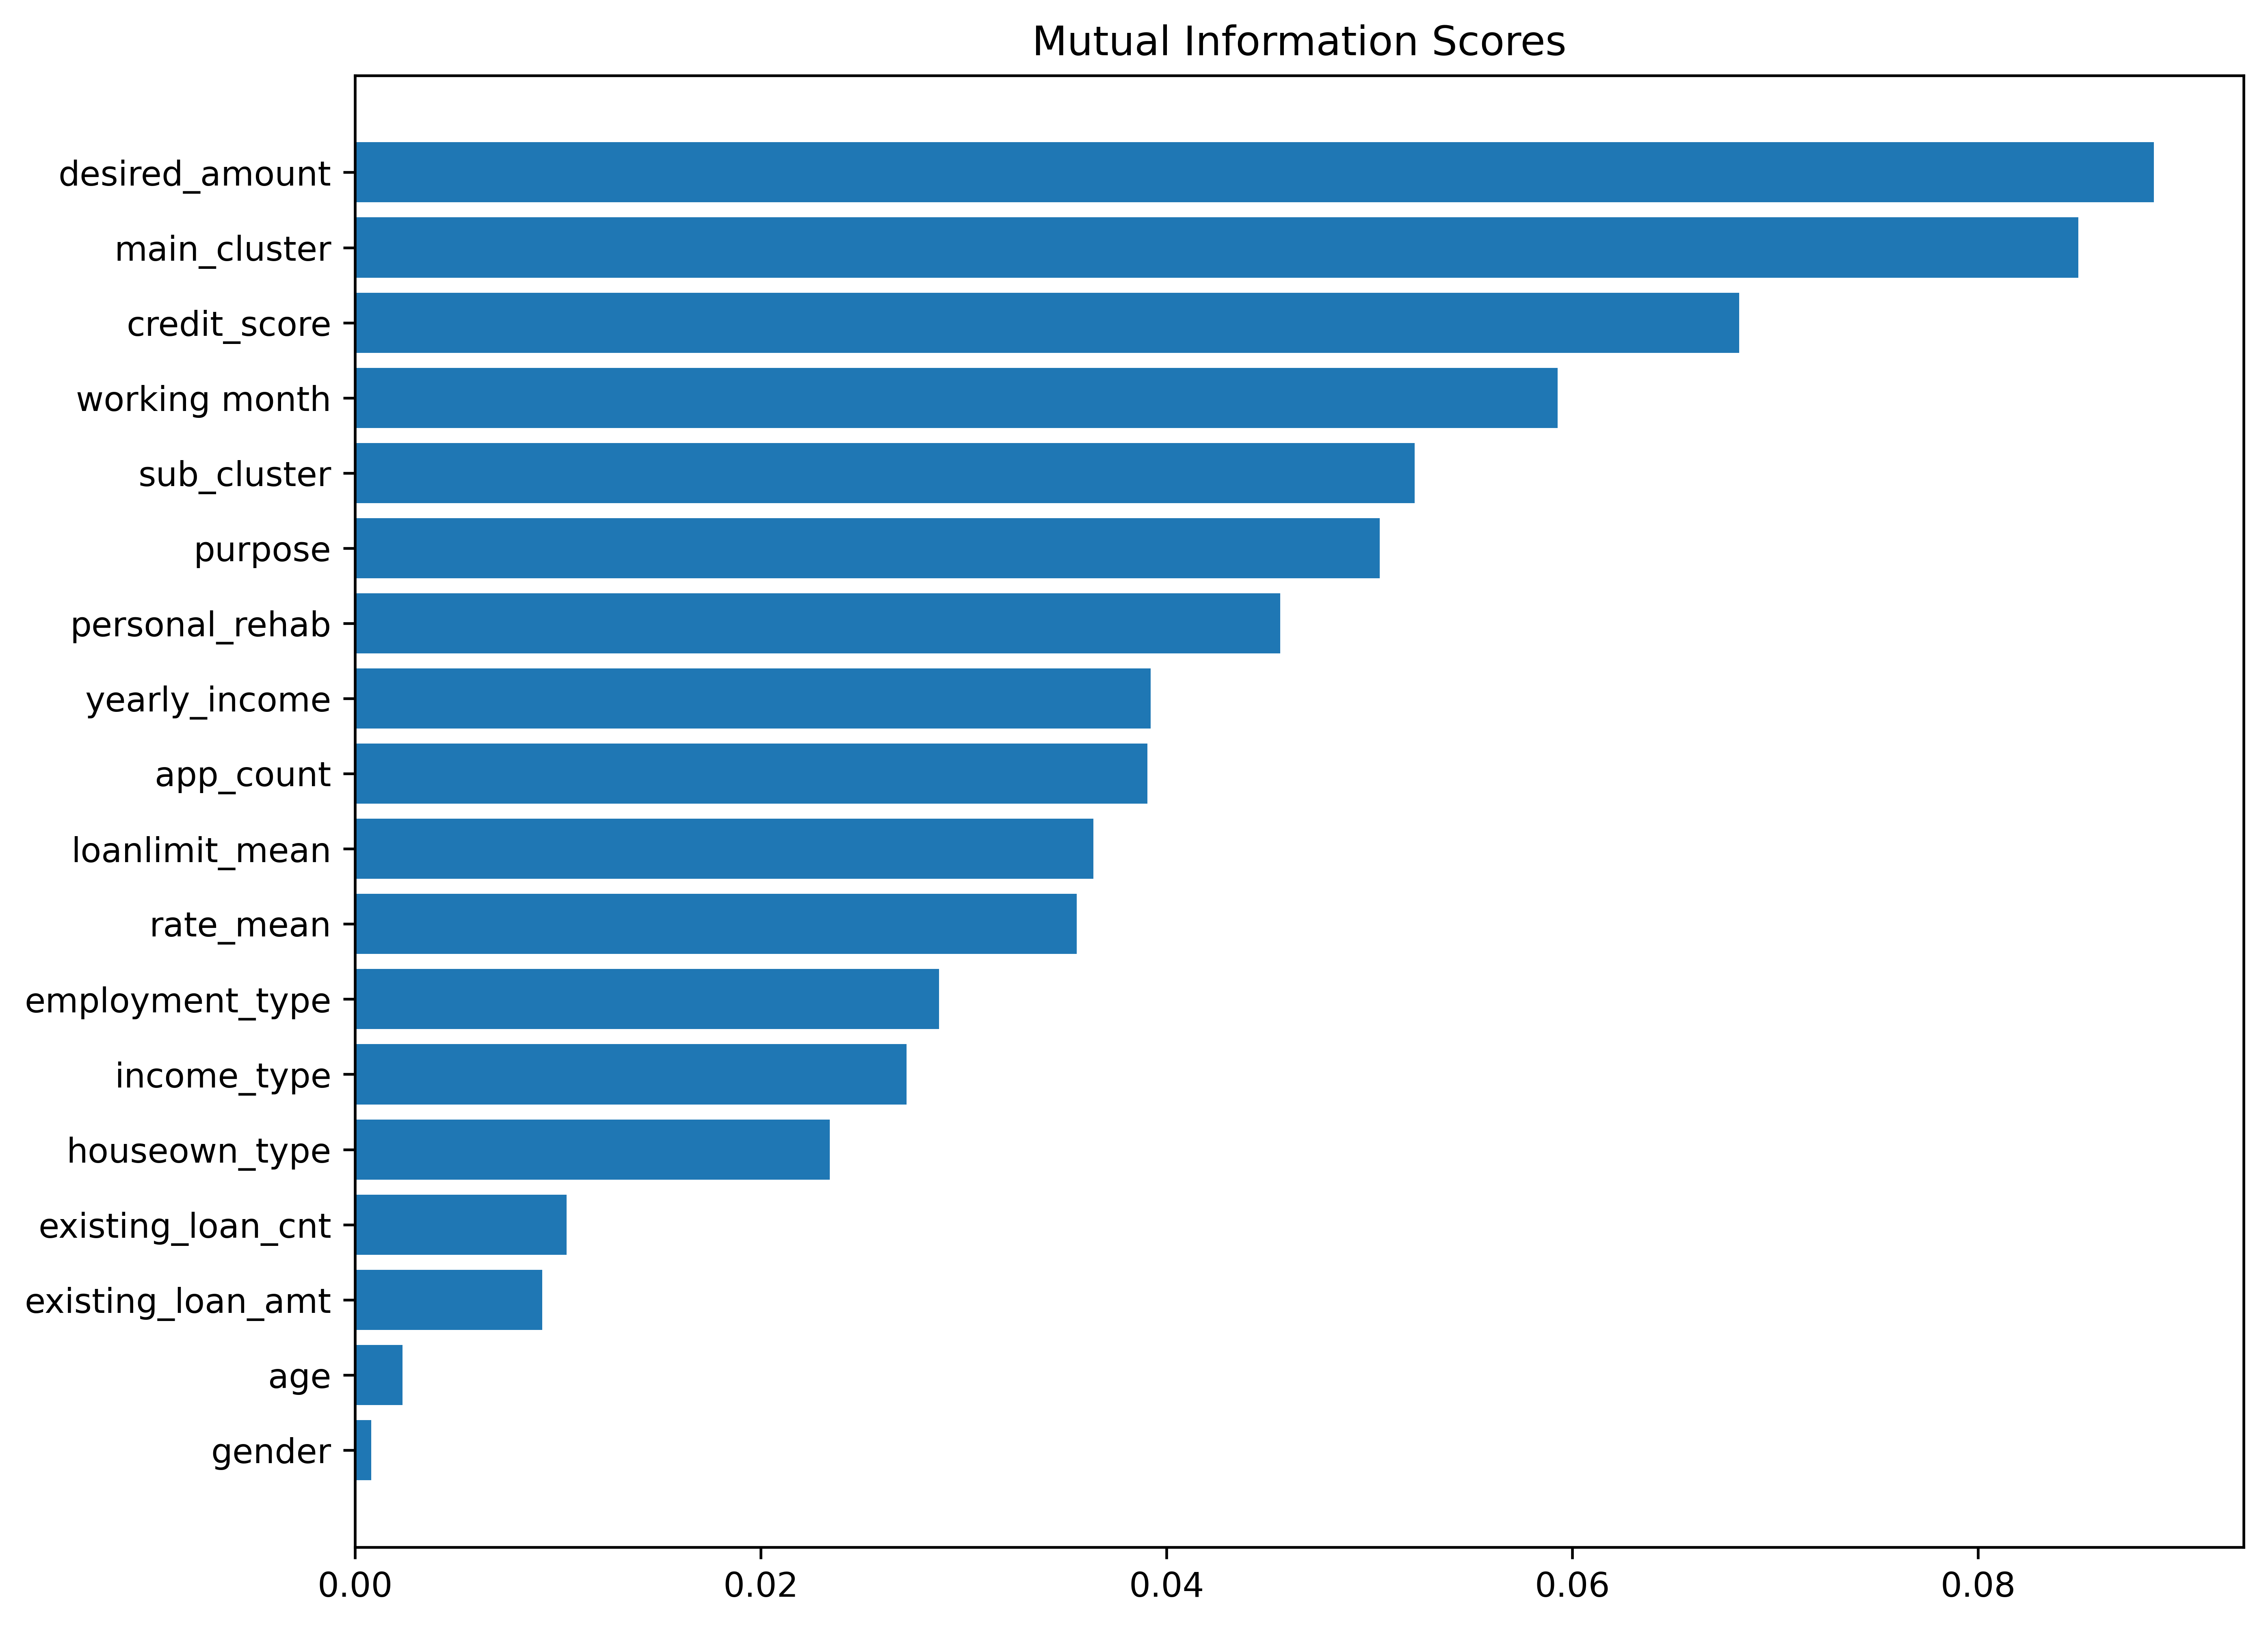

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

#mpl.rcParams['font.family']='Arial'
#mpl.rcParams['font.size']=30
plt.figure(dpi=600, figsize=(10, 8))
plot_mi_scores(mi_scores)
plt.savefig('/content/drive/MyDrive/공모전/빅콘테스트 2022/data/클러/miscore.png')

In [ ]:
#클러스터링 최종변수 선정 => employment_type부터 밑에까지 삭제

In [ ]:
col = ['desired_amount','main_cluster','credit_score','working month','sub_cluster','purpose','personal_rehab','yearly_income','app_count','apply_count','loanlimit_mean','rate_mean']